In [69]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [70]:
import nltk 
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
import re
from nltk.tokenize import word_tokenize
import gensim
from keras.preprocessing.text import Tokenizer

In [72]:
from nltk.stem import PorterStemmer 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [73]:
df = pd.read_csv('/content/Tweets.csv')

In [74]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [75]:
df.shape

(14640, 15)

In [76]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [77]:
#notre objectif est de prédicter la valeur de la colonne "airlaine_sentiment"

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [79]:
# les colonnes "airline_sentiment_gold " et "negativereason_gold" ont trop peu de valeurs non nulles
#donc on va les supprimer

In [80]:
df.drop(['airline_sentiment_gold','negativereason_gold'],axis=1,inplace=True)

In [81]:
df.tweet_coord.nunique()

832

In [82]:
#parmi 1019 valeurs non nulles du colonne 'tweet_coord' ilya 832 valeurs uniques
#donc c'est une colonne peu important

In [83]:
df.drop(['tweet_coord'],axis=1,inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.3+ MB


In [85]:
df.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [86]:
df.negativereason.nunique()

10

In [87]:
#trés bien il ya que 10 valeurs uniques

In [88]:
nr = df.negativereason.unique()
nr

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [89]:
nr.reshape(1,11)

array([[nan, 'Bad Flight', "Can't Tell", 'Late Flight',
        'Customer Service Issue', 'Flight Booking Problems',
        'Lost Luggage', 'Flight Attendant Complaints',
        'Cancelled Flight', 'Damaged Luggage', 'longlines']], dtype=object)

In [90]:
nr[0]

nan

In [91]:
nr[5]

'Flight Booking Problems'

In [92]:
df.negativereason.iloc[0] = 'Bad Flight'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [93]:
df.negativereason.iloc[0]

'Bad Flight'

In [94]:
df.negativereason.iloc[1] is np.NaN

True

In [95]:
import random
for k in range (df.shape[0]):
  if df.negativereason.iloc[k] is np.NaN:
    p = random.randint(1, 10)
    df.negativereason.iloc[k] = nr[p]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                14640 non-null  object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.3+ MB


In [97]:
#on va vérifier le résultat
df.negativereason.value_counts()

Customer Service Issue         3408
Late Flight                    2221
Can't Tell                     1747
Cancelled Flight               1369
Lost Luggage                   1317
Bad Flight                     1109
Flight Booking Problems        1090
Flight Attendant Complaints    1048
longlines                       708
Damaged Luggage                 623
Name: negativereason, dtype: int64

In [98]:
#trés bien

In [99]:
df.negativereason_confidence.nunique()

1410

In [100]:
#1410 valeurs se répétent dans 10522 lignes donc on va les utiliser pour remplacer les valeurs 'NaN'
nr = df.negativereason_confidence.unique()
len(nr)

1411

In [101]:
nr.reshape(1,1411)

array([[   nan, 0.    , 0.7033, ..., 0.6234, 0.644 , 0.7255]])

In [107]:
df.negativereason_confidence = df.negativereason_confidence.astype('object')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                14640 non-null  object 
 4   negativereason_confidence     10522 non-null  object 
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


In [109]:
for k in range (df.shape[0]):
  if df.negativereason_confidence.iloc[k] is np.NaN:
    p = random.randint(1, 1411)
    df.negativereason_confidence.iloc[k] = nr[p]

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                14640 non-null  object 
 4   negativereason_confidence     10522 non-null  object 
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


In [111]:
df.user_timezone.nunique()

85

In [112]:
#trés bien juste 85 uniques valeurs qui se répétent dans plus de 9000 lignes

In [113]:
nr = df.user_timezone.unique()
nr.reshape(1,86)

array([['Eastern Time (US & Canada)', 'Pacific Time (US & Canada)',
        'Central Time (US & Canada)', 'America/New_York',
        'Atlantic Time (Canada)', 'Quito', nan,
        'Mountain Time (US & Canada)', 'Vienna', 'Caracas',
        'Kuala Lumpur', 'Brisbane', 'Arizona', 'London', 'Tehran',
        'Alaska', 'Sydney', 'Irkutsk', 'Santiago', 'Amsterdam',
        'Tijuana', 'Abu Dhabi', 'Central America', 'Edinburgh',
        'Jerusalem', 'Hawaii', 'Paris', 'Guam', 'New Delhi', 'Stockholm',
        'America/Chicago', 'Berlin', 'Madrid', 'Athens', 'Brussels',
        'Taipei', 'Rome', 'Beijing', 'Mexico City', 'Bern', 'Singapore',
        'Indiana (East)', 'Melbourne', 'Saskatchewan', 'Casablanca',
        'Brasilia', 'Kyiv', 'Bucharest', 'Greenland', 'Prague',
        'New Caledonia', 'Bogota', 'Seoul', 'Sarajevo', 'Wellington',
        'Bangkok', 'Warsaw', 'Copenhagen', 'Hong Kong', 'Guadalajara',
        'Mid-Atlantic', 'Mazatlan', 'Buenos Aires',
        'America/Los_Angeles'

In [114]:
for k in range (df.shape[0]):
  if df.user_timezone.iloc[k] is np.NaN:
    p = random.randint(1, 85)
    df.user_timezone.iloc[k] = nr[p]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                14640 non-null  object 
 4   negativereason_confidence     10522 non-null  object 
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 14585 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


In [116]:
df.tweet_location.nunique()

3081

In [117]:
nr = df.tweet_location.unique()
nr.shape

(3082,)

In [118]:
nr.reshape(1,3082)

array([[nan, 'Lets Play', 'San Francisco CA', ..., 'Columbus, OH, USA',
        'Milwaukee County, Wisconsin', 'Nigeria,lagos']], dtype=object)

In [120]:
for k in range (df.shape[0]):
  if df.tweet_location.iloc[k] is np.NaN:
    p = random.randint(1, 3081)
    df.tweet_location.iloc[k] = nr[p]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                14640 non-null  object 
 4   negativereason_confidence     10522 non-null  object 
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                14640 non-null  object 
 11  user_timezone                 14585 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


In [122]:
#ilya un probléme avec la colonne 'negativereason_confidence'

In [128]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,Bad Flight,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,"ÜT: 41.498967,2.186957",Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,Damaged Luggage,0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,"Montreal, Quebec CA",Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,Cancelled Flight,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,Punk is the preacher.,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,WORLDWIDE,Pacific Time (US & Canada)


In [144]:
df.negativereason_confidence.iloc[0]  in range(0,2)

False

In [145]:
df.negativereason_confidence.iloc[0] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [146]:
df.negativereason_confidence.iloc[0]  

1

In [147]:
nr = df.negativereason_confidence.unique()

In [148]:
nr.shape

(1411,)

In [149]:
nr.reshape(1,1411)

array([[1, 0.0, nan, ..., 0.6234, 0.644, 0.7255]], dtype=object)

In [155]:
nr[2] = 0.644

In [156]:
nr

array([1, 0.0, 0.644, ..., 0.6234, 0.644, 0.7255], dtype=object)

In [157]:
for k in range (df.shape[0]):
  if df.negativereason_confidence.iloc[k] not in range(0,2):
    p = random.randint(0,1410)
    df.negativereason_confidence.iloc[k] = nr[p]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                14640 non-null  object 
 4   negativereason_confidence     14640 non-null  object 
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                14640 non-null  object 
 11  user_timezone                 14585 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


In [164]:
#trés bien 

In [165]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,Bad Flight,1,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,"ÜT: 41.498967,2.186957",Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,Damaged Luggage,0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,"Montreal, Quebec CA",Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,Cancelled Flight,0.6878,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.6636,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,Punk is the preacher.,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,WORLDWIDE,Pacific Time (US & Canada)


In [166]:
df.drop(['tweet_id'],axis=1,inplace=True)

In [167]:
df.name.nunique()

7701

In [169]:
X = df.drop(['airline_sentiment'],axis=1)
y = df.airline_sentiment

In [170]:
y = y.replace({'negative' : 0 , 'neutral' : 1 , 'positive' : 2})

In [171]:
#on va traiter la colonne "tweet_created"

In [172]:
X['year'] = pd.to_datetime(X.tweet_created).dt.year
X['day'] = pd.to_datetime(X.tweet_created).dt.day
X['month'] = pd.to_datetime(X.tweet_created).dt.month
X['hour'] = pd.to_datetime(X.tweet_created).dt.hour
X['minute'] = pd.to_datetime(X.tweet_created).dt.minute
X['second'] = pd.to_datetime(X.tweet_created).dt.second

In [173]:
X.head()

,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,year,day,month,hour,minute,second
0,1.0000,Bad Flight,1,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,"ÜT: 41.498967,2.186957",Eastern Time (US & Canada),2015,24,2,11,35,52
1,0.3486,Damaged Luggage,0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,"Montreal, Quebec CA",Pacific Time (US & Canada),2015,24,2,11,15,59
2,0.6837,Cancelled Flight,0.6878,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2015,24,2,11,15,48
3,1.0000,Bad Flight,0.6636,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,Punk is the preacher.,Pacific Time (US & Canada),2015,24,2,11,15,36
4,1.0000,Can't Tell,1,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,WORLDWIDE,Pacific Time (US & Canada),2015,24,2,11,14,45


In [175]:
X.drop(['tweet_created'],axis=1,inplace=True)

In [177]:
X.drop(['name'],axis=1,inplace=True)

In [176]:
from sklearn.preprocessing import LabelEncoder

In [181]:
X.negativereason = X.negativereason.astype('str')
X.airline = X.airline.astype('str')
X.tweet_location = X.tweet_location.astype('str')
X.user_timezone = X.user_timezone.astype('str')
columns_to_Encode = ["negativereason","airline","tweet_location","user_timezone"]
le = LabelEncoder()
for each in columns_to_Encode:
    X[each] = le.fit_transform(X[each])

In [182]:
X.head()

,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_location,user_timezone,year,day,month,hour,minute,second
0,1.0000,0,1,5,0,@VirginAmerica What @dhepburn said.,2271,31,2015,24,2,11,35,52
1,0.3486,4,0,5,0,@VirginAmerica plus you've added commercials t...,521,62,2015,24,2,11,15,59
2,0.6837,2,0.6878,5,0,@VirginAmerica I didn't today... Must mean I n...,246,27,2015,24,2,11,15,48
3,1.0000,0,0.6636,5,0,@VirginAmerica it's really aggressive to blast...,1028,62,2015,24,2,11,15,36
4,1.0000,1,1,5,0,@VirginAmerica and it's a really big bad thing...,1666,62,2015,24,2,11,14,45


In [183]:
#Etape suivante : traiter la colonne "text"

In [185]:
X.tail()

,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_location,user_timezone,year,day,month,hour,minute,second
14635,0.3487,4,0,0,0,@AmericanAir thank you we got on a different f...,1316,83,2015,22,2,12,1,1
14636,1.0000,3,1,0,0,@AmericanAir leaving over 20 minutes Late Flig...,1474,35,2015,22,2,11,59,46
14637,1.0000,3,0.3365,0,0,@AmericanAir Please bring American Airlines to...,747,37,2015,22,2,11,59,15
14638,1.0000,3,0.6316,0,0,"@AmericanAir you have my money, you change my ...",667,31,2015,22,2,11,59,2
14639,0.6771,4,0,0,0,@AmericanAir we have 8 ppl so we need 2 know h...,1912,45,2015,22,2,11,58,51


In [187]:
X['len_text'] = X['text'].apply(len)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Length Histogram')

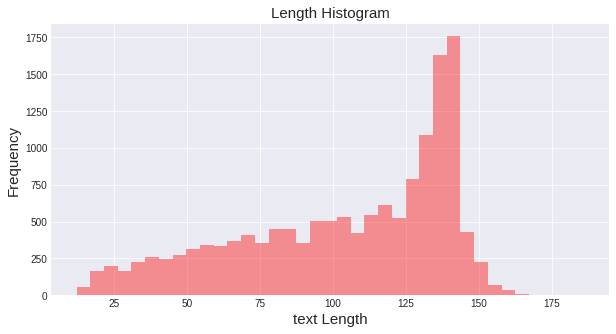

In [188]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
sns.distplot(X['len_text'],kde=False,color='red',hist=True)
plt.xlabel("text Length",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Length Histogram",size=15)

In [189]:
from nltk.stem.porter import PorterStemmer

In [190]:
ps = PorterStemmer() #pour "text preprocessing"

message = []

for i in range(0, X.shape[0]):
    #accepter que les mots alphabétiques
    review = re.sub('[^a-zA-Z]', ' ', X['text'][i])
    #convertir tous minuscule
    review = review.lower()
    #splitter chaque ligne
    review = review.split()
    #
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    #construire de nouveau la ligne
    review = ' '.join(review)
    message.append(review)

In [192]:
X['clean_text']=np.empty((len(message),1))
for i in range(len(message)):
    X['clean_text'][i]=message[i]
X['clean_text_len']=X['clean_text'].apply(len)
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_location,user_timezone,year,day,month,hour,minute,second,len_text,clean_text,clean_text_len
0,1.0000,0,1,5,0,@VirginAmerica What @dhepburn said.,2271,31,2015,24,2,11,35,52,35,virginamerica dhepburn said,27
1,0.3486,4,0,5,0,@VirginAmerica plus you've added commercials t...,521,62,2015,24,2,11,15,59,72,virginamerica plu ad commerci experi tacki,42
2,0.6837,2,0.6878,5,0,@VirginAmerica I didn't today... Must mean I n...,246,27,2015,24,2,11,15,48,71,virginamerica today must mean need take anoth ...,50
3,1.0000,0,0.6636,5,0,@VirginAmerica it's really aggressive to blast...,1028,62,2015,24,2,11,15,36,126,virginamerica realli aggress blast obnoxi ente...,80
4,1.0000,1,1,5,0,@VirginAmerica and it's a really big bad thing...,1666,62,2015,24,2,11,14,45,55,virginamerica realli big bad thing,34


In [199]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=15000)
X1 = cv.fit_transform(message).toarray()

In [200]:
X1.shape

(14640, 10805)

In [201]:
X2 = X.copy()

In [205]:
X2.drop(['text','clean_text'],axis=1,inplace=True)

In [206]:
X3 = pd.DataFrame(data=X1)

In [207]:
X3.shape

(14640, 10805)

In [210]:
X4 = pd.concat([X2,X3],axis=1)

In [211]:
X4.shape

(14640, 10820)

In [212]:
x_train,x_test,y_train,y_test = train_test_split(X4,y,test_size=0.2,random_state=42)


In [213]:
#modéle1

In [214]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)

In [216]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [217]:
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8049863387978142

In [218]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier(random_state=42, n_estimators=100,min_samples_split=100)
gbk.fit(x_train, y_train)
gbk_predict = gbk.predict(x_test)
print("Gradient Boosting Score :",accuracy_score(y_test,gbk_predict ))

Gradient Boosting Score : 0.8271857923497268


In [219]:
#82% précision c'est bien
#on peut essayer avec un neural network pour obtenir plus de précision